<h1> UCB1 </h1>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [4]:
def normalise(array):
    maximum=max(array)
    minimum=min(array)
    for i in range(len(array)):
        array[i]=(array[i]-minimum)/(maximum-minimum)
    return array

In [5]:
def epsilon_greedy(k,eps,iterations,mu='random'):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [6]:
def ucb_1(k,iterations,mu='random'):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        
        if step==0: #at first step we have to play each arm atleast once
            for a in range(k):
                reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1
                #updating counts
                pulls+=1
                arm_pull_number[a]+=1
                #updating the rewards
                total_reward+=reward
                avg_reward[step]=total_reward/pulls
                #updating the estimated value of arm a pulled at the current iteration
                q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
        
        else:
            
            upper_bound_arm=q+np.sqrt(np.divide(2*np.log(step),arm_pull_number))
            a=np.argmax(upper_bound_arm) #choosoing the arm with maximum upper bound
        
            reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
            #updating counts
            pulls+=1
            arm_pull_number[a]+=1
        
            #updating the rewards
            total_reward+=reward
            avg_reward[step]=total_reward/pulls
        
            #updating the estimated value of arm a pulled at the current iteration
            q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [7]:
def epsilon_greedy_decay(k,iterations,mu='random'):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    beta=1/k #scaling factor
    
    #decayed epsilon=1/(1+n*beta) ->n=steps taken till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if p<1/(1+step*beta): #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [8]:
def epsilon_greedy_oiv(k,eps,iterations,mu='random'):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.ones(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    #setting the optimistic initial bias term for each reward
    for i in range(len(q)):
        q[i]=5
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [11]:
k=10 #number of arms
episodes=1000 #no of times the total experiments are conducted
iterations=1000 #no of pulls in 1 episode
mu=np.random.normal(0,1,k) #true expected rewards of all the 10 arms-all rewards are sampled from normal distributions with sttd-dev 1 

#long term rewards- avg rewards over all the episodes
reward_1_long=np.zeros(iterations)
reward_decay_long=np.zeros(iterations)
reward_ucb1_long=np.zeros(iterations)
reward_oiv_long=np.zeros(iterations)

#long term arm pulls- avg number of pulls of each arm over all the episodes
arm_pulls1_long=np.zeros(k)
arm_pulls_decay_long=np.zeros(k)
arm_pulls_ucb1_long=np.zeros(k)
arm_pulls_oiv_long=np.zeros(k)


for i in tqdm(range(episodes)):
    q_1,avg_reward_1,arm_pull_number1=epsilon_greedy(k,0.1,iterations,mu)
    q_decay,avg_reward_decay,arm_pull_number_decay=epsilon_greedy_decay(k,iterations,mu)
    q_ucb1,avg_reward_ucb1,arm_pull_number_ucb1=ucb_1(k,iterations,mu)
    q_oiv,avg_reward_oiv,arm_pull_number_oiv=epsilon_greedy_oiv(k,0,iterations,mu='random') #greedy
    
    #updating the long term rewards
    reward_1_long=reward_1_long+(avg_reward_1-reward_1_long)/(i+1)
    reward_decay_long=reward_decay_long+(avg_reward_decay-reward_decay_long)/(i+1)
    reward_ucb1_long=reward_ucb1_long+(avg_reward_ucb1-reward_ucb1_long)/(i+1)
    reward_oiv_long=reward_oiv_long+(avg_reward_oiv-reward_oiv_long)/(i+1)
    
    #updating the long term arm pulls
    arm_pulls1_long=arm_pulls1_long+(arm_pull_number1-arm_pulls1_long)/(i+1)
    arm_pulls_decay_long=arm_pulls_decay_long+(arm_pull_number_decay-arm_pulls_decay_long)/(i+1)
    arm_pulls_ucb1_long=arm_pulls_ucb1_long+(arm_pull_number_ucb1-arm_pulls_ucb1_long)/(i+1)
    arm_pulls_oiv_long=arm_pulls_oiv_long+(arm_pull_number_oiv-arm_pulls_oiv_long)/(i+1)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 22.83it/s]


<h1> Graphical Analysis-UCB1 Algorithm </h1>

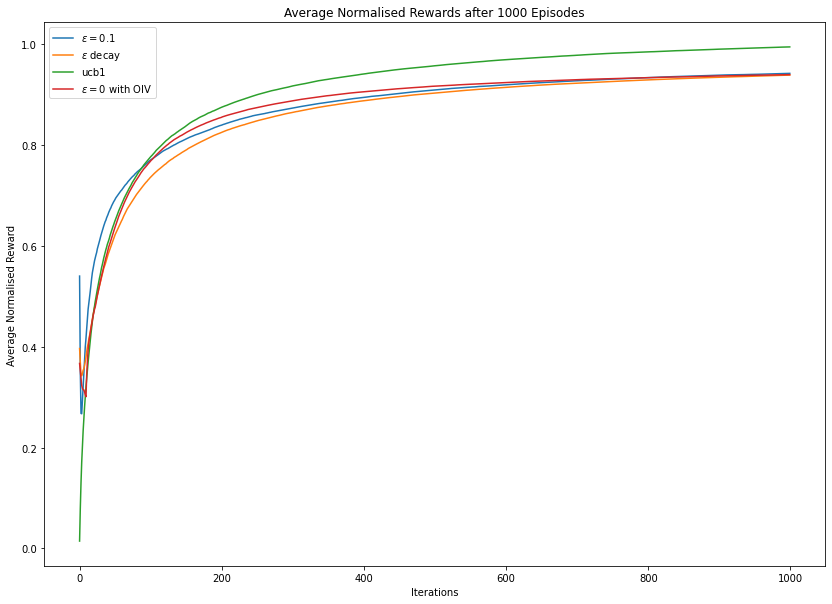

In [12]:
plt.figure(figsize=(14,10))
plt.plot(reward_1_long, label="$\epsilon=0.1$")
plt.plot(reward_decay_long, label="$\epsilon$ decay")
plt.plot(reward_ucb1_long, label="ucb1")
plt.plot(reward_oiv_long, label="$\epsilon=0$ with OIV")
plt.xlabel("Iterations")
plt.ylabel("Average Normalised Reward")
plt.title("Average Normalised Rewards after " + str(episodes) + " Episodes")
plt.legend()
plt.show()

<h1> Quantitative Analysis-UCB1 Algorithm </h1>

In [13]:
print("the most optimal arm: ")
optimal_index=np.argmax(mu) 
optimal_arm=optimal_index+1 #indexing starts from 0
print(optimal_arm)

the most optimal arm: 
5


In [15]:
expected_values=np.vstack((mu,q_1,q_decay,q_ucb1))
data=pd.DataFrame(expected_values)
data.columns=["arm "+str(i) for i in range(1,11)]
data.index=["True Expected Reward", "Estimated Expected Reward for $\epsilon=0.1$",
            "Estimated Expected Reward for $\epsilon$ decay","Estimated Expected Reward for UCB1"]
data

,arm 1,arm 2,arm 3,arm 4,arm 5,arm 6,arm 7,arm 8,arm 9,arm 10
True Expected Reward,0.169208,-2.650055,-2.636362,-0.289472,1.436295,-0.374204,0.342467,-0.073925,0.139702,0.792322
Estimated Expected Reward for $\epsilon=0.1$,0.102896,-2.175520,-2.953983,-0.330426,1.404342,0.046626,0.742854,0.151382,0.177491,0.955585
Estimated Expected Reward for $\epsilon$ decay,0.117272,-2.669297,-3.643689,0.275578,1.450467,-0.829785,0.406515,-0.479313,0.449048,0.404181
Estimated Expected Reward for UCB1,0.358040,-2.546277,-2.540283,0.080259,1.455637,0.048572,-0.387807,-0.884970,0.014349,0.709472


<h1> Percentage Arm Pulls-Epsilon Decay Method </h1>

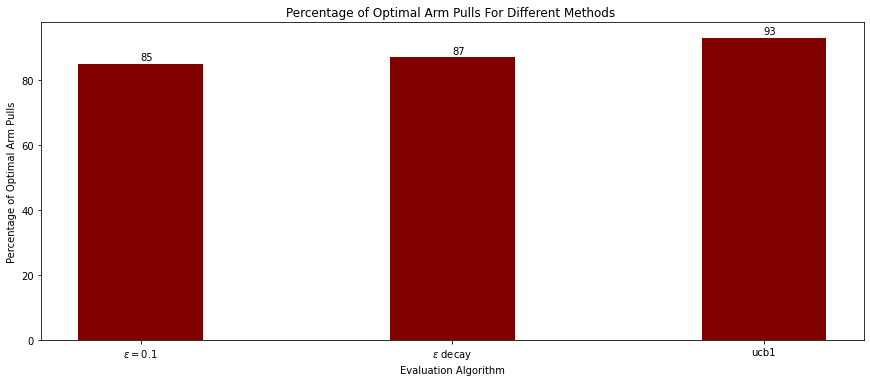

In [16]:
#calculating the percentage optimum arm pulls over the total number of pulls for each epsilon

percent_optimal_pull_1=round((arm_pulls1_long[optimal_index]/np.sum(arm_pulls1_long))*100)
percent_optimal_pull_decay=round((arm_pulls_decay_long[optimal_index]/np.sum(arm_pulls_decay_long))*100)
percent_optimal_pull_ucb1=round((arm_pulls_ucb1_long[optimal_index]/np.sum(arm_pulls_ucb1_long))*100)


eps_val = ["$\epsilon=0.1$","$\epsilon$ decay","ucb1"]
percent_optimal_pull=[percent_optimal_pull_1,percent_optimal_pull_decay,percent_optimal_pull_ucb1]
  
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(eps_val,percent_optimal_pull,color="maroon",width=0.4)
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(percent_optimal_pull):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.xlabel("Evaluation Algorithm")
plt.ylabel("Percentage of Optimal Arm Pulls")
plt.title("Percentage of Optimal Arm Pulls For Different Methods ")
plt.show()